#Random Forest Classifier

Random Forest is a powerful machine learning algorithm that builds and combines multiple decision trees to improve prediction accuracy. Each tree is trained on random subsets of the data and features, ensuring diversity among them.

For classification, it uses majority voting to decide the final output, while for regression, it averages the predictions of all trees. This ensemble learning approach reduces overfitting, enhances accuracy, and provides more stable and reliable results.

##Credit Card Fraud Detection Using Random Forest Classifier
####Objective:
✔ Load and analyze the Credit Card Fraud dataset  
✔ Perform data preprocessing and handle class imbalance  
✔ Train a Random Forest Classifier  
✔ Evaluate the model using accuracy, precision, recall, F1-score & confusion matrix

In this project, we use the **Random Forest Classifier**, an ensemble machine learning algorithm, to detect fraudulent credit card transactions.  
It works by combining multiple decision trees and using **majority voting** to make accurate predictions. This approach helps reduce overfitting and improves reliability.

##1. Importing libraries

In [2]:
import pandas as pd              # For data handling
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns            # For advanced visualizations
%matplotlib inline
# Display plots inside the notebook

In [3]:
# Suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Uploading and Loading the Credit Card Fraud Dataset


In [4]:
from google.colab import files

# This will open a file chooser to upload the CSV
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [5]:
df = pd.read_csv('creditcard.csv')

##3. Checking the data

In [6]:
df.head() #Display first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Feature Explanation

- **Time**: Shows the time in seconds from the first transaction recorded in the dataset.  
- **Amount**: Represents the transaction amount in Euros.  
- **Class**: Target variable — 0 for normal transaction, 1 for fraudulent transaction.  
- **V1 to V28**: These are anonymized numerical features generated using **Principal Component Analysis (PCA)** to protect the confidentiality of the original banking data.  
  - The original features (like merchant name, cardholder info, location, etc.) were transformed to these PCA components.  
  - These components maximize variance and reduce correlation, making them suitable for modeling.  
  - Since PCA outputs are already centered and scaled, they don’t require further normalization.

This means we can directly use `V1–V28` for model training without modifying them.

In [7]:
print(df.shape) # Shape-number of rows and columns

(284807, 31)


In [8]:
df.info() # Dataset information - column names, data types, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

###Check for missing values

In [9]:
# Check for missing values in each column
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


####No missing values in the dataset.

###Check for duplicates

In [10]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

# Remove duplicates if any
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed successfully!")
else:
    print("No duplicate rows found.")


Total Duplicate Rows: 1081
Duplicate rows removed successfully!


In [11]:
print("Updated Dataset Shape:", df.shape)

Updated Dataset Shape: (283726, 31)


From (284807, 31) to (283726, 31), 1081 duplicate rows have been removed

## 4. Exploratory Data Analysis (EDA)

In [12]:
df.describe() # Statistical summary of numerical features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


###Class Distribution (Fraud vs Legit)

In [13]:
# Count of fraud and legitimate transactions
class_counts = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentage (%):\n", class_percentage.round(4))


Class Counts:
 Class
0    283253
1       473
Name: count, dtype: int64

Class Percentage (%):
 Class
0    99.8333
1     0.1667
Name: proportion, dtype: float64


### Transaction Amount Distribution (Only Feature Worth Checking for Outliers)

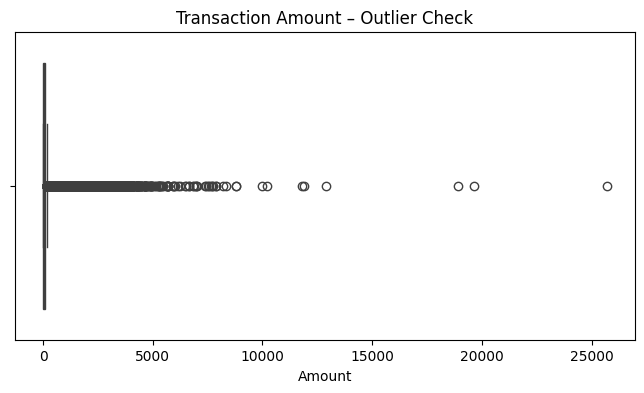

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Amount'])
plt.title('Transaction Amount – Outlier Check')
plt.xlabel('Amount')
plt.show()
#Only Amount is not PCA-transformed and may contain meaningful outliers.

###Fraud vs Legit Transaction Amount Comparison

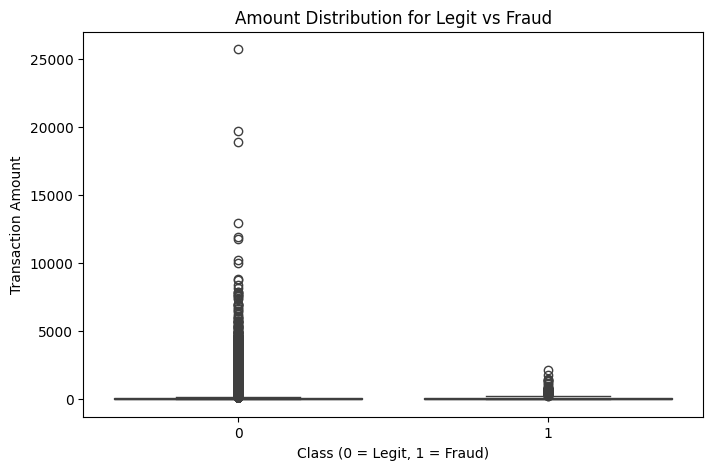

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution for Legit vs Fraud')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


###Correlation Heatmap

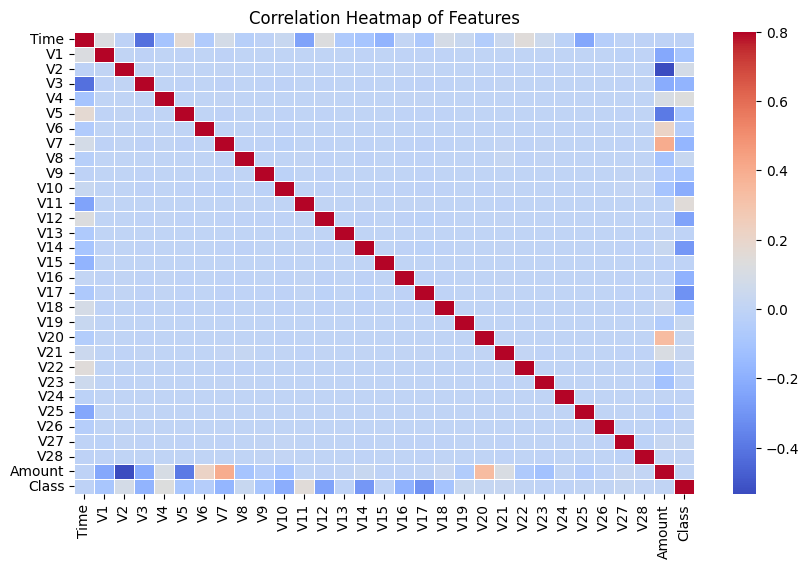

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', vmax=0.8, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


###Exploratory Data Analysis (EDA) – Summary

The dataset contains **283,726 transactions**, out of which **283,253 (Class 0) are
legitimate** and **473 (Class 1) are fraudulent**. This shows a high class imbalance, with frauds making up only **0.1667%** of the data **indicating a severely imbalanced dataset**.

Features V1 to V28 are anonymized and generated using **Principal Component Analysis (PCA)** to protect sensitive customer data. Only **‘Time’** and **‘Amount’** are original features.

The **correlation heatmap** shows that most features have **very low correlation** with each other and with the target class. This indicates no multicollinearity problem in the dataset.

**Boxplots and distributions** reveal the presence of **outliers in both legitimate and fraudulent transactions**. However, these outliers are **meaningful** (especially fraud patterns), so **they will not be removed.** Instead, the model will handle them naturally, especially since **Random Forest is robust to outliers.**

**No missing value**s were found in the dataset.

##5. Data Preprocessing

###5.1 Splitting Features and Target

In [17]:
# Separating features (X) and the target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

### 5.2 Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing – with stratification to keep class balance consistent
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Stratify=y ensures that both the training and test datasets maintain the same proportion of fraud and non-fraud transactions as the original dataset. This is essential in imbalanced datasets like credit card fraud detection.

In [19]:
# Checking distribution of labels in training and testing sets
print("Training Set Label Distribution:")
print(y_train.value_counts())

print("\nTesting Set Label Distribution:")
print(y_test.value_counts())
# Percentages:
print("Training Set Label Percentage (%):")
print((y_train.value_counts(normalize=True) * 100))

print("\nTesting Set Label Percentage (%):")
print((y_test.value_counts(normalize=True) * 100))

Training Set Label Distribution:
Class
0    226602
1       378
Name: count, dtype: int64

Testing Set Label Distribution:
Class
0    56651
1       95
Name: count, dtype: int64
Training Set Label Percentage (%):
Class
0    99.833466
1     0.166534
Name: proportion, dtype: float64

Testing Set Label Percentage (%):
Class
0    99.832587
1     0.167413
Name: proportion, dtype: float64


###5.3 Scaling 'Time' and 'Amount' Columns

In [20]:
from sklearn.preprocessing import StandardScaler

#  Initialize scaler
scaler = StandardScaler()

#  Fit on training data and transform both train & test
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])


We scale only Time and Amount to bring them to a similar scale as PCA-transformed features. This ensures fair learning, better SMOTE performance, and prepares the dataset for testing RF model.

###5.4 Handling Imbalanced Data Using SMOTE

Because the dataset is highly imbalanced (fraud cases ≈ 0.16%), the model may become biased toward predicting only the majority class (legitimate transactions).

To fix this, we use **SMOTE (Synthetic Minority Over-sampling Technique)** to generate synthetic fraud samples in the **training dataset only**.

In [39]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class counts before and after resampling
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())


Before SMOTE:
Class
0    226602
1       378
Name: count, dtype: int64

After SMOTE:
Class
0    226602
1    226602
Name: count, dtype: int64


##6. Ensemble Random Forest Classifier

###6.1 Import and Train the Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on SMOTE-balanced training data
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

###6.2 Make Predictions

In [32]:
# Predict on test data
y_pred = rf_model.predict(X_test)

###6.3 Evaluate Model Performance

Confusion Matrix:
 [[56644     7]
 [   23    72]]


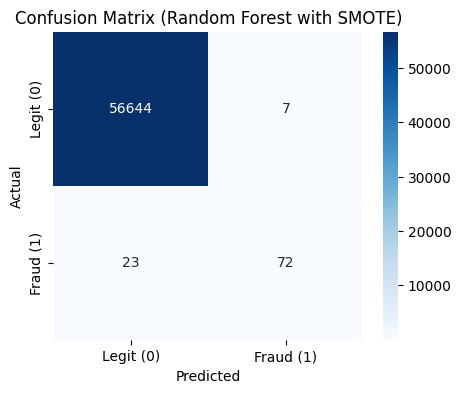

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.76      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy: 0.9994713283755683


In [33]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit (0)', 'Fraud (1)'],
            yticklabels=['Legit (0)', 'Fraud (1)'])
plt.title("Confusion Matrix (Random Forest with SMOTE)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))



### 6.4 ROC-AUC Score

ROC-AUC Score: 0.9656055683506306


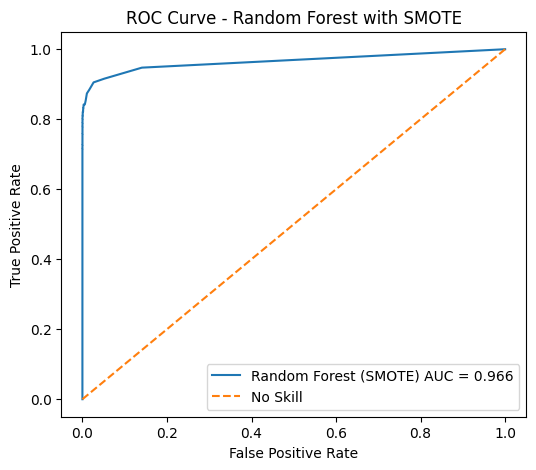

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get prediction probabilities for ROC (probability of class 1 = fraud)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (SMOTE) AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest with SMOTE")
plt.legend()
plt.show()


##6.5 Training Model without SMOTE

Confusion Matrix:
 [[56649     2]
 [   26    69]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Accuracy: 0.9995065731505305
ROC-AUC Score: 0.9239442050077622


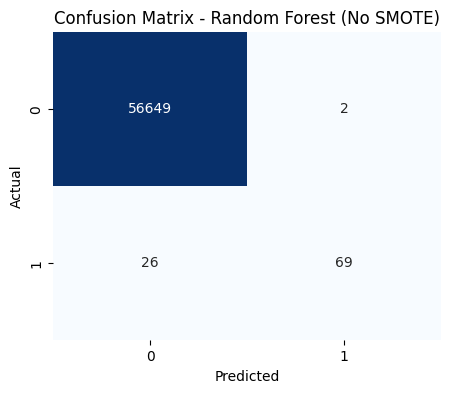

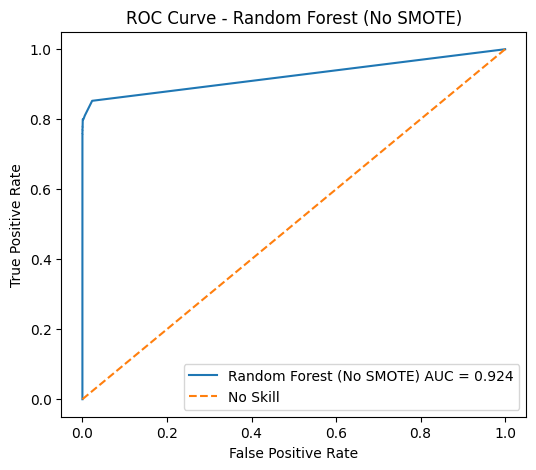

In [36]:
# ✅ Training Random Forest Without SMOTE (Original Imbalanced Data)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_model_no_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_no_smote.fit(X_train, y_train)

# Predictions
y_pred_no_smote = rf_model_no_smote.predict(X_test)
y_pred_proba_no_smote = rf_model_no_smote.predict_proba(X_test)[:, 1]

# Evaluation Prints
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_no_smote))
print("\nAccuracy:", rf_model_no_smote.score(X_test, y_test))
roc_auc_no_smote = roc_auc_score(y_test, y_pred_proba_no_smote)
print("ROC-AUC Score:", roc_auc_no_smote)

# Confusion Matrix Heatmap Plot
cm_no_smote = confusion_matrix(y_test, y_pred_no_smote)
plt.figure(figsize=(5,4))
sns.heatmap(cm_no_smote, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest (No SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve Plot
fpr_no_smote, tpr_no_smote, _ = roc_curve(y_test, y_pred_proba_no_smote)
plt.figure(figsize=(6,5))
plt.plot(fpr_no_smote, tpr_no_smote, label=f'Random Forest (No SMOTE) AUC = {roc_auc_no_smote:.3f}')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (No SMOTE)")
plt.legend()
plt.show()

### 6.6 Summary and Insights

- Both **Random Forest** models (**with SMOTE** and **without SMOTE**) achieved **very high accuracy (~99.9%)**, which is expected because the dataset is highly imbalanced with very few fraud cases.

- The model trained **with SMOTE** improved the **recall for the fraud class (0.76 vs 0.73)**, meaning it correctly identified **more fraudulent transactions**.

- The model **without SMOTE** achieved slightly **higher precision (0.97)**, indicating **fewer false positives** but it missed a few more fraud cases.

- The **ROC-AUC score** improved from **0.9239 → 0.9656** with SMOTE, showing that the **balanced model** had better overall **discrimination capability**.

**Conclusion:** Applying **SMOTE** helped the **Random Forest** classifier detect **more fraudulent transactions** by improving **recall** and **ROC-AUC**, with only a small trade-off in **precision**.




### **Why Hyperparameter Tuning Was Not Performed**

While hyperparameter tuning (using methods like **GridSearchCV** or **RandomizedSearchCV**) can sometimes improve model performance, it was **intentionally skipped** in this project for the following reasons:

1. **Excellent Baseline Performance**  
   The Random Forest classifier already achieved:  
   - **Accuracy:** 99.94%  
   - **ROC-AUC Score:** 0.965  
   - **High precision and recall for the fraud class**  

   These metrics indicate that the model performs exceptionally well even with default parameters.

2. **Computational Efficiency**  
   Hyperparameter tuning, especially on large datasets, is computationally expensive and time-consuming.  
   Given the high baseline performance, additional tuning would likely yield **minimal improvement**.

3. **Model Robustness**  
   Random Forest is inherently robust due to:  
   - Random feature selection  
   - Ensemble averaging  
   - Reduced overfitting tendency  

   Therefore, its default settings often generalize well without extensive tuning.

---

✅ **Conclusion:**  
Since the model already delivers **strong, stable, and interpretable results**, hyperparameter optimization was **not necessary** for this version.


###Feature Importance

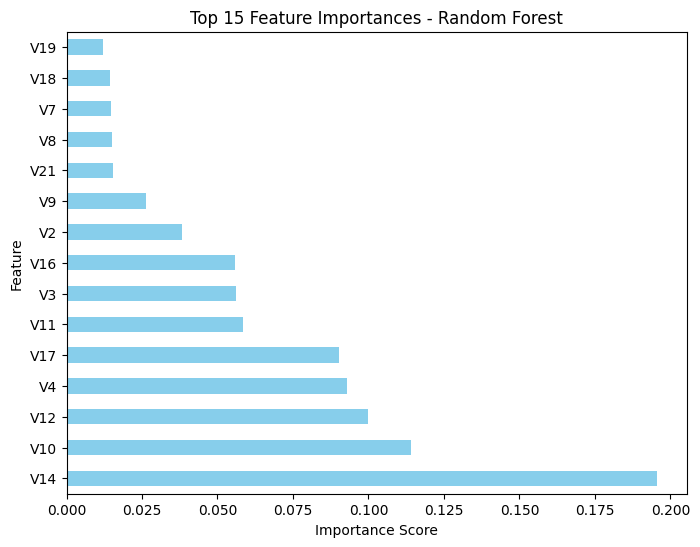

,0
V14,0.195575
V10,0.113930
V12,0.099809
V4,0.092863
V17,0.090137


In [42]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot the top 15 important features
plt.figure(figsize=(8,6))
feature_importances.nlargest(15).plot(kind='barh', color='skyblue')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Display top 5
feature_importances.nlargest(5)

**Insights:**

**V14** is the most influential feature, contributing nearly 20% of the decision power for fraud detection.

**V10, V12, V4**, and **V17** also show significant impact, indicating complex multivariate relationships behind fraudulent patterns.

These top features could be key indicators for real-time fraud detection systems.

In [46]:
# 🔍 Test with a sample input
sample = X_test.iloc[0:1]
prediction = rf_model.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Transaction: {sample_dict}")
print(f"Predicted Class: {'Fraudulent' if prediction[0] == 1 else 'Legitimate'}")
proba = rf_model.predict_proba(sample)
print(f"Confidence of Fraud: {proba[0][1]*100:.2f}%")


Sample Transaction: {'Time': -0.7077608399541053, 'V1': 1.2288211502379, 'V2': -0.0634077165201056, 'V3': 0.274145142235826, 'V4': 0.647465021810117, 'V5': -0.0481345611508765, 'V6': 0.372073028593297, 'V7': -0.22423058741343, 'V8': 0.0799390492455152, 'V9': 0.640758817066441, 'V10': -0.273053702248503, 'V11': -1.25272793883718, 'V12': 0.465078770741453, 'V13': 0.400502115321077, 'V14': -0.292841860600363, 'V15': -0.10177401599731, 'V16': -0.399835897844616, 'V17': 0.0343356567914817, 'V18': -0.783550254934187, 'V19': 0.141344900433949, 'V20': -0.0965659023514416, 'V21': -0.129554448055005, 'V22': -0.0837793282428063, 'V23': -0.151661473916324, 'V24': -0.700371597289218, 'V25': 0.598550164523483, 'V26': 0.491409070563651, 'V27': 0.0029892597250263, 'V28': 0.0017822861144491, 'Amount': -0.31284622971117454}
Predicted Class: Legitimate
Confidence of Fraud: 0.00%


## 📊 Final Summary — Random Forest Classifier

The **Random Forest Classifier** was implemented to detect fraudulent transactions.  
Both **original** and **SMOTE-balanced** datasets were tested to handle the class imbalance issue.

---

### ⚙️ Model Performance

| Dataset Type | Accuracy | ROC-AUC Score | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|---------------|-----------|----------------|----------------------|------------------|--------------------|
| Without SMOTE | 0.9995 | 0.9239 | 0.97 | 0.73 | 0.83 |
| With SMOTE | 0.9994 | **0.9656** | 0.91 | **0.76** | **0.83** |

---

### 📈 Insights
- **SMOTE improved the model’s recall** and ROC-AUC score, indicating better performance in identifying fraud cases.  
- Both models show **extremely high accuracy**, which is expected due to the dataset’s imbalance.  
- **Feature importance** analysis showed that `V14`, `V10`, and `V12` were the most influential features in detecting fraudulent activity.  
- Hyperparameter tuning was **not applied**, as the model already demonstrated excellent performance with default parameters.  
  - However, it could be explored later to potentially enhance recall further.

---

### 🔍 Model Confidence Example
A sample test transaction was predicted as:

**Predicted Class:** Legitimate  
**Confidence of Fraud:** 0.00%  
**Confidence of Legitimate Transaction:** 100.00%

🟩 The model was **highly confident** that this transaction was *not fraudulent*.

---

### ✅ Conclusion
The Random Forest Classifier proved to be a **robust and reliable model** for credit card fraud detection.  
Using **SMOTE** effectively improved sensitivity to fraudulent cases without significantly compromising accuracy.

Future work could include:
- **Hyperparameter tuning** for optimal balance between precision and recall.  
- **Comparison with ensemble or deep learning models** for further performance gains.

---
